# Regresion Logística

In [1]:
# Importamos las librerias Necesarias

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



Datos de  Desercion
Distribución de Clases (Desbalanceadas)

In [6]:
# 0 : No Deserto, 1 : Deserto
# Carga de Datos
ruta = "C:\\UNIR\\VIDAMA\\8. TFM\\DatosTFM\\EncuestaTratada-v5.xlsx"
rutap = "C:\\UNIR\\VIDAMA\\8. TFM\\DatosTFM\\DatosPrueba.xlsx"

estudiantes = pd.read_excel(ruta, header=0)
prueba = pd.read_excel(rutap, header=0)
print(estudiantes.head(6))  # Ver las primeras filas del dataset


   NivelCarrera  Genero  RangoEdad  EstadoCivil  Discapacidad  Con-quien-Vive  \
0             4       1          4            1             0               4   
1             4       1          4            1             0               3   
2             4       1          3            1             0               3   
3             1       1          2            1             0               3   
4             4       1          3            1             0               3   
5             2       1          2            1             0               3   

   Actividades-Realiza  TipoCalamidad  Sustenta-Hermanos  Sustenta-Padre  \
0                    3              4                  0               0   
1                    1              0                  0               1   
2                    1              4                  0               1   
3                    0              3                  0               0   
4                    1              4               

In [8]:
# Ver tipo de datos
estudiantes.dtypes
# print(prueba.head())  # Ver las primeras filas del dataset

NivelCarrera                   int64
Genero                         int64
RangoEdad                      int64
EstadoCivil                    int64
Discapacidad                   int64
Con-quien-Vive                 int64
Actividades-Realiza            int64
TipoCalamidad                  int64
Sustenta-Hermanos              int64
Sustenta-Padre                 int64
Sustenta-Madre                 int64
Sustenta-FamiliaresCercanos    int64
Sustenta-YoPago                int64
Sustenta-UniversidadBeca       int64
Sustenta-PrestamoFinanciero    int64
Numero-Personas-familia        int64
Zona-Colegio-Graduacion        int64
Tipo-Colegio-Grado             int64
Ingreso-mensual-Hogar          int64
Deserto                        int64
dtype: object

In [10]:
# Verificar las estadisticas 
estudiantes.describe()

,NivelCarrera,Genero,RangoEdad,EstadoCivil,Discapacidad,Con-quien-Vive,Actividades-Realiza,TipoCalamidad,Sustenta-Hermanos,Sustenta-Padre,Sustenta-Madre,Sustenta-FamiliaresCercanos,Sustenta-YoPago,Sustenta-UniversidadBeca,Sustenta-PrestamoFinanciero,Numero-Personas-familia,Zona-Colegio-Graduacion,Tipo-Colegio-Grado,Ingreso-mensual-Hogar,Deserto
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,1.985680,0.684964,2.322196,1.007160,0.023866,3.026253,0.894988,3.214797,0.031026,0.735084,0.689737,0.069212,0.112172,0.023866,0.002387,1.491647,0.804296,0.937947,2.178998,0.236277
std,1.102318,0.465085,1.036999,0.084414,0.152815,0.839673,1.110390,1.978756,0.173596,0.441816,0.463154,0.254118,0.315955,0.152815,0.048853,0.720049,0.397216,1.268298,2.169589,0.425302
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,0.000000
max,4.000000,1.000000,6.000000,2.000000,1.000000,5.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,5.000000,1.000000


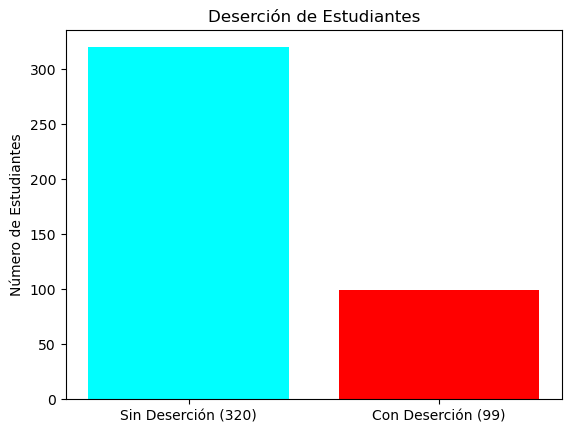

In [11]:
# Contar valores
num_sindesercion = (estudiantes['Deserto'] == 0).sum()  # Estudiantes sin deserción
num_condesercion = (estudiantes['Deserto'] == 1).sum()  # Estudiantes con deserción

# Gráfica de barras
plt.bar(["Sin Deserción (%d)" % num_sindesercion, 
         "Con Deserción (%d)" % num_condesercion], 
        [num_sindesercion, num_condesercion], 
        color=["cyan", "red"], 
        width=0.8)

plt.ylabel("Número de Estudiantes")  # Etiqueta del eje Y
plt.title("Deserción de Estudiantes")  # Título de la gráfica
plt.show()


## 1. Desbalanceo: Separo los datos por Clase

In [12]:
datos_desercion = estudiantes[estudiantes['Deserto']==1]
datos_sindesercion = estudiantes[estudiantes['Deserto']==0]

## 2. Sobremuestro con reemplazo

In [14]:
sobremuestreo_desercion = datos_desercion.sample(n=320, replace=True, random_state=0)
sobremuestreo_desercion

,NivelCarrera,Genero,RangoEdad,EstadoCivil,Discapacidad,Con-quien-Vive,Actividades-Realiza,TipoCalamidad,Sustenta-Hermanos,Sustenta-Padre,Sustenta-Madre,Sustenta-FamiliaresCercanos,Sustenta-YoPago,Sustenta-UniversidadBeca,Sustenta-PrestamoFinanciero,Numero-Personas-familia,Zona-Colegio-Graduacion,Tipo-Colegio-Grado,Ingreso-mensual-Hogar,Deserto
232,2,1,2,1,0,3,0,4,0,1,1,0,0,0,0,1,1,1,3,1
248,1,1,2,1,0,3,1,0,0,1,0,0,0,0,0,2,1,2,5,1
314,1,1,1,1,0,3,1,4,0,1,1,0,0,0,0,1,1,3,0,1
319,1,1,2,1,0,3,2,4,0,1,1,0,0,0,0,1,0,0,0,1
319,1,1,2,1,0,3,2,4,0,1,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1,1,6,1,0,0,1,4,0,0,0,0,1,1,0,1,1,3,1,1
383,2,1,3,1,0,3,0,4,0,1,1,0,0,0,0,2,1,0,1,1
258,1,0,2,1,0,3,0,6,0,1,0,0,0,0,0,1,1,3,5,1
224,2,0,2,1,0,3,3,0,0,1,0,0,0,0,0,2,0,0,0,1


## 3. Submuestreo sin Remplazo

In [16]:
submuestreo_sindesercion = datos_sindesercion.sample(n=99, replace=False, random_state=0)
submuestreo_sindesercion

,NivelCarrera,Genero,RangoEdad,EstadoCivil,Discapacidad,Con-quien-Vive,Actividades-Realiza,TipoCalamidad,Sustenta-Hermanos,Sustenta-Padre,Sustenta-Madre,Sustenta-FamiliaresCercanos,Sustenta-YoPago,Sustenta-UniversidadBeca,Sustenta-PrestamoFinanciero,Numero-Personas-familia,Zona-Colegio-Graduacion,Tipo-Colegio-Grado,Ingreso-mensual-Hogar,Deserto
221,4,1,3,1,0,3,2,2,0,1,1,0,0,0,0,1,1,0,5,0
329,1,0,2,1,0,3,3,1,0,0,1,0,0,0,0,2,1,0,1,0
18,2,1,1,1,0,4,0,4,0,1,1,0,0,0,0,1,1,0,3,0
72,3,1,3,1,0,3,0,3,0,1,0,1,0,0,0,3,1,3,0,0
269,3,1,3,1,0,3,2,0,0,1,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,4,1,4,1,0,3,0,0,0,1,1,0,0,0,0,0,1,0,0,0
51,3,0,2,1,0,3,0,4,0,1,1,0,0,0,0,2,1,0,2,0
264,1,1,2,1,0,3,0,4,0,1,1,0,0,0,0,2,1,0,1,0
333,4,0,2,1,0,3,1,4,0,0,1,0,0,0,0,2,1,2,0,0


## Preparacion de Datos para Clasificadores

In [18]:
sobremuestro = pd.concat([sobremuestreo_desercion, datos_sindesercion])
datos_sobremuestreo = sobremuestro.iloc[:, :-1]
clase_sobremuestreo = sobremuestro.iloc[:, -1:]

submuestreo = pd.concat([datos_desercion, submuestreo_sindesercion])
datos_submuestreo = submuestreo.iloc[:, :-1]
clase_submuestreo = submuestreo.iloc[:, -1:]

desbalanceado = pd.concat([datos_desercion, datos_sindesercion])
datos_desbalanceado = desbalanceado.iloc[:, :-1]
clase_desbalanceado = desbalanceado.iloc[:, -1:]


# Datos para probar los modelos (son solo 20 instancias)
datos_prueba = prueba.iloc[:, :-1]
clase_prueba = prueba.iloc[:, -1:]

In [103]:
#print(datos_desbalanceado.isna().sum())
print(datos_prueba.isna().sum())


NivelCarrera                   0
Genero                         0
RangoEdad                      0
EstadoCivil                    0
Discapacidad                   0
Con-quien-Vive                 0
Actividades-Realiza            0
TipoCalamidad                  0
Sustenta-Hermanos              0
Sustenta-Padre                 0
Sustenta-Madre                 0
Sustenta-FamiliaresCercanos    0
Sustenta-YoPago                0
Sustenta-UniversidadBeca       0
Sustenta-PrestamoFinanciero    0
Numero-Personas-familia        0
Zona-Colegio-Graduacion        0
Tipo-Colegio-Grado             0
Ingreso-mensual-Hogar          0
dtype: int64


## Creación y Evaluación de 3 Modelos
## Regresión Logística

# Desbalanceo

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def matriz_de_confusion(y_true, y_pred, titulo="Matriz de Confusión"):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    # Calcular el accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Mostrar la matriz de confusión con visualización
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    
    # Personalizar el título incluyendo el accuracy
    plt.title(f"{titulo}\nAccuracy: {accuracy:.2f}")
    plt.show()


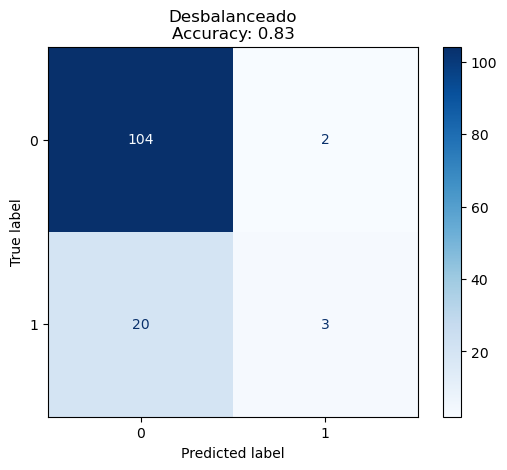

In [22]:

modelo = LogisticRegression().fit(datos_desbalanceado.values, 
                                  clase_desbalanceado.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Desbalanceado") 

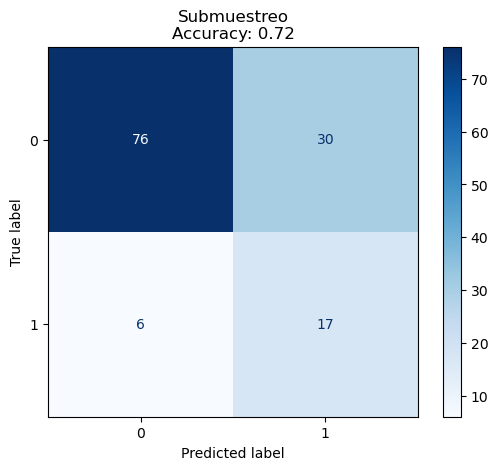

In [24]:
modelo = LogisticRegression().fit(datos_submuestreo.values, 
                                  clase_submuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Submuestreo") 


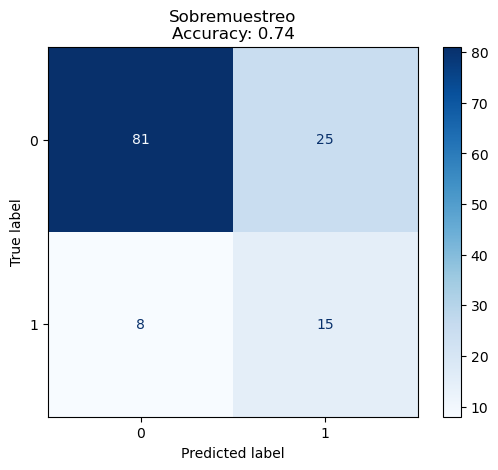

In [26]:
modelo = LogisticRegression().fit(datos_sobremuestreo.values, 
                                  clase_sobremuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Sobremuestreo") 

Desbalanceado -  Metricas

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [30]:
# Predicciones
predicciones = modelo.predict(datos_prueba.values)

# Cálculo de métricas
accuracy = accuracy_score(clase_prueba.values, predicciones)
precision = precision_score(clase_prueba.values, predicciones, average='binary')  # Cambia a 'macro' si tienes más de 2 clases
recall = recall_score(clase_prueba.values, predicciones, average='binary')
f1 = f1_score(clase_prueba.values, predicciones, average='binary')

# Mostrar métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Reporte de clasificación completo (opcional)
print("\nReporte de clasificación:")
print(classification_report(clase_prueba.values, predicciones))

Accuracy: 0.74
Precision: 0.38
Recall: 0.65
F1-Score: 0.48

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       106
           1       0.38      0.65      0.48        23

    accuracy                           0.74       129
   macro avg       0.64      0.71      0.65       129
weighted avg       0.81      0.74      0.77       129



## Submuestreo

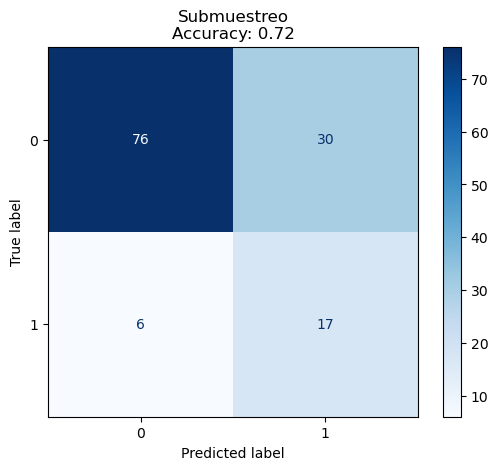

In [32]:
modelo = LogisticRegression().fit(datos_submuestreo.values, 
                                  clase_submuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Submuestreo") 

# Submuestreo - Otras metricas

In [34]:
# Predicciones
predicciones_submuestreo = modelo.predict(datos_prueba.values)

# Cálculo de métricas
accuracy_submuestreo = accuracy_score(clase_prueba.values, predicciones_submuestreo)
precision_submuestreo = precision_score(clase_prueba.values, predicciones_submuestreo, average='binary')  # Cambia a 'macro' si tienes más de 2 clases
recall_submuestreo = recall_score(clase_prueba.values, predicciones_submuestreo, average='binary')
f1_submuestreo = f1_score(clase_prueba.values, predicciones_submuestreo, average='binary')

# Mostrar métricas
print(f"Accuracy (Submuestreo): {accuracy_submuestreo:.2f}")
print(f"Precision (Submuestreo): {precision_submuestreo:.2f}")
print(f"Recall (Submuestreo): {recall_submuestreo:.2f}")
print(f"F1-Score (Submuestreo): {f1_submuestreo:.2f}")

# Reporte de clasificación completo (opcional)
# print("\nReporte de clasificación (Submuestreo):")
# print(classification_report(clase_prueba.values, predicciones_submuestreo))

Accuracy (Submuestreo): 0.72
Precision (Submuestreo): 0.36
Recall (Submuestreo): 0.74
F1-Score (Submuestreo): 0.49


## Sobremuestreo 

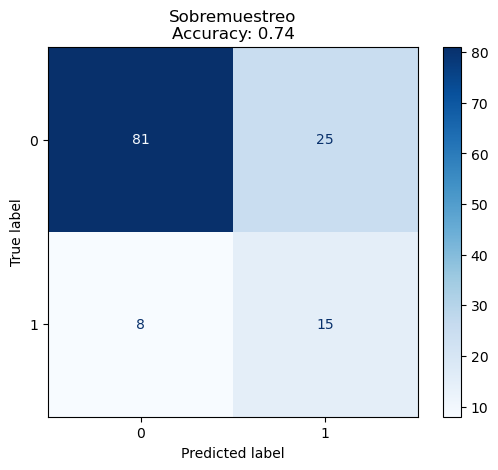

In [36]:
modelo = LogisticRegression().fit(datos_sobremuestreo.values, 
                                  clase_sobremuestreo.values.reshape(-1))
matriz_de_confusion(clase_prueba.values, 
                    modelo.predict(datos_prueba.values), 
                    "Sobremuestreo") 

# Metricas - SobreMuestreo

In [38]:
# Predicciones
predicciones_sobremuestreo = modelo.predict(datos_prueba.values)

# Cálculo de métricas
accuracy_sobremuestreo = accuracy_score(clase_prueba.values, predicciones_sobremuestreo)
precision_sobremuestreo = precision_score(clase_prueba.values, predicciones_sobremuestreo, average='binary')  # Cambiar a 'macro' si hay más de 2 clases
recall_sobremuestreo = recall_score(clase_prueba.values, predicciones_sobremuestreo, average='binary')
f1_sobremuestreo = f1_score(clase_prueba.values, predicciones_sobremuestreo, average='binary')

# Mostrar métricas
print(f"Accuracy (Sobremuestreo): {accuracy_sobremuestreo:.2f}")
print(f"Precision (Sobremuestreo): {precision_sobremuestreo:.2f}")
print(f"Recall (Sobremuestreo): {recall_sobremuestreo:.2f}")
print(f"F1-Score (Sobremuestreo): {f1_sobremuestreo:.2f}")

# Reporte de clasificación completo (opcional)
# print("\nReporte de clasificación (Sobremuestreo):")
# print(classification_report(clase_prueba.values, predicciones_sobremuestreo))


Accuracy (Sobremuestreo): 0.74
Precision (Sobremuestreo): 0.38
Recall (Sobremuestreo): 0.65
F1-Score (Sobremuestreo): 0.48


# Desbalanceo 

In [40]:
# Predicciones para datos desbalanceados
predicciones_desbalanceado = modelo.predict(datos_prueba.values)

# Cálculo de métricas
accuracy_desbalanceado = accuracy_score(clase_prueba.values, predicciones_desbalanceado)
precision_desbalanceado = precision_score(clase_prueba.values, predicciones_desbalanceado, average='binary')  # Cambiar a 'macro' si hay más de 2 clases
recall_desbalanceado = recall_score(clase_prueba.values, predicciones_desbalanceado, average='binary')
f1_desbalanceado = f1_score(clase_prueba.values, predicciones_desbalanceado, average='binary')

# Mostrar métricas
print(f"Accuracy (Desbalanceado): {accuracy_desbalanceado:.2f}")
print(f"Precision (Desbalanceado): {precision_desbalanceado:.2f}")
print(f"Recall (Desbalanceado): {recall_desbalanceado:.2f}")
print(f"F1-Score (Desbalanceado): {f1_desbalanceado:.2f}")


Accuracy (Desbalanceado): 0.74
Precision (Desbalanceado): 0.38
Recall (Desbalanceado): 0.65
F1-Score (Desbalanceado): 0.48


In [48]:
# Predecimos la Clase 
import numpy as np

# Nueva muestra 

# nueva_muestra = np.array([[4,1,3,1,0,3,1,4,0,1,1,0,0,0,0,1,1,0,0]])  # Clase 1
# nueva_muestra = np.array([[4,1,4,1,0,4,3,4,0,0,1,0,0,0,0,0,1,0,0]])  # clase 0

# nueva_muestra = np.array([[2,1,2,1,0,3,0,4,0,1,1,0,0,0,0,1,1,0,0]])  # clase 0
nueva_muestra = np.array([[1,1,3,1,0,3,2,4,0,1,0,0,0,0,0,0,0,0,5]])  # clase 1

# Predecir la clase
prediccion = modelo.predict(nueva_muestra)


print("Clase predicha:", prediccion[0])

# Para ver la probabilidad de cada clase:
probabilidades = modelo.predict_proba(nueva_muestra)
print("Distribución de probabilidades:", probabilidades)
print("Clase con mayor probabilidad:", np.argmax(probabilidades))


Clase predicha: 1
Distribución de probabilidades: [[0.13879006 0.86120994]]
Clase con mayor probabilidad: 1


In [57]:
# Perfil del estudiante que deserta
from sklearn.linear_model import LogisticRegression

# Separar variables predictoras (X) y variable objetivo (y)
X = estudiantes.drop(columns=['Deserto'])  # Variables independientes
y = estudiantes['Deserto']  # Variable dependiente

# Ajustar modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000, solver='liblinear')  # Aumentamos iteraciones para mejor convergencia
modelo.fit(X, y)

# Obtener los coeficientes de la regresión
coeficientes = modelo.coef_[0]

# Crear un DataFrame con los coeficientes y las variables
importancia_variables = pd.DataFrame({
    'Variable': X.columns,
    'Peso': coeficientes
})

# Ordenar de mayor a menor impacto en la deserción
importancia_variables = importancia_variables.sort_values(by='Peso', ascending=False)

# Mostrar los resultados al usuario
display(importancia_variables)


,Variable,Peso
14,Sustenta-PrestamoFinanciero,0.683952
8,Sustenta-Hermanos,0.673980
2,RangoEdad,0.510908
16,Zona-Colegio-Graduacion,0.309522
13,Sustenta-UniversidadBeca,0.308607
6,Actividades-Realiza,0.224019
3,EstadoCivil,0.096378
7,TipoCalamidad,0.053108
18,Ingreso-mensual-Hogar,-0.010052
1,Genero,-0.017481
